In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("iris.csv")

#statistics summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.shape

(150, 5)

# data cleaning

In [11]:
#checking null values
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df.duplicated().sum()

3

In [14]:
df = df.drop_duplicates()
print("After removing duplicates:",df.shape)

After removing duplicates: (147, 5)


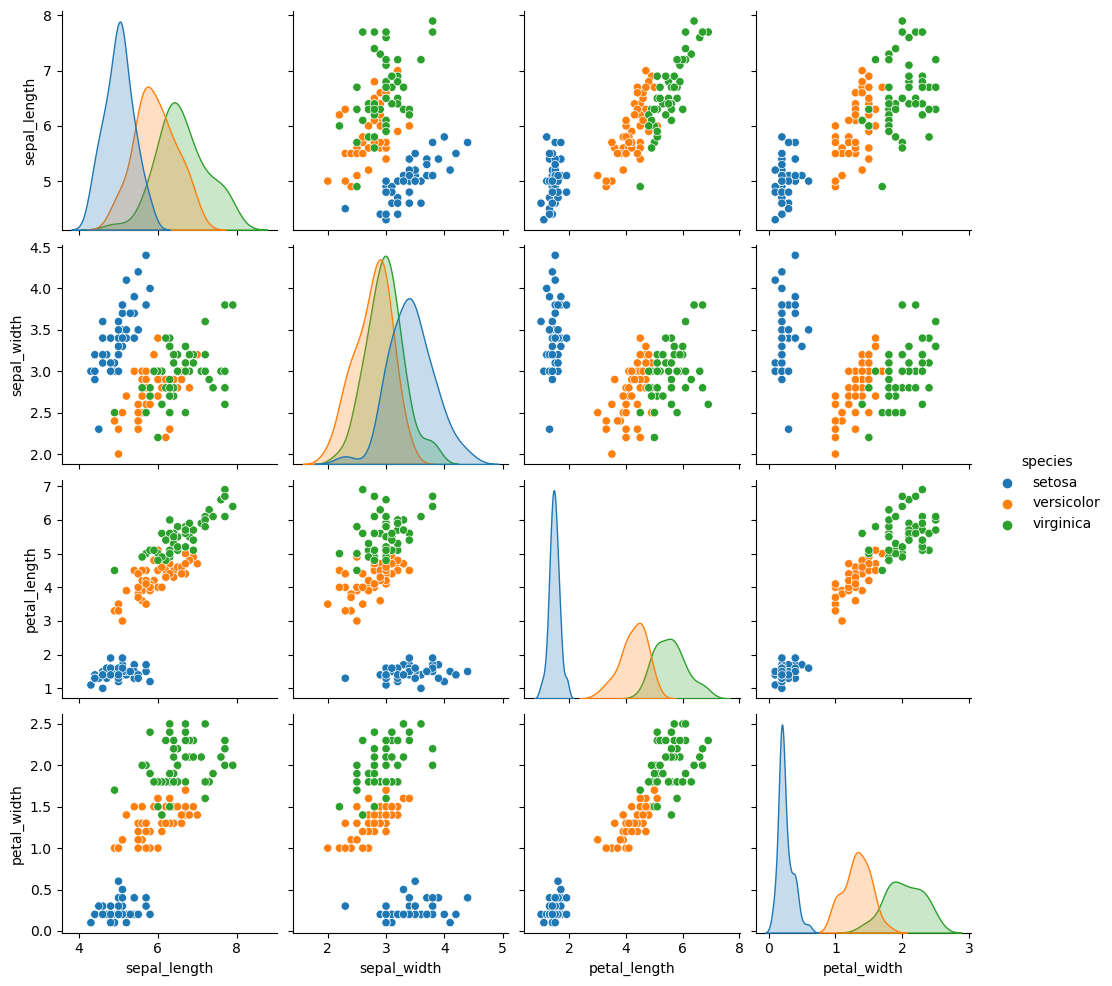

In [15]:
# Data set visulaization

#scatter plot compares two variables
sns.pairplot(df,hue = "species",diag_kind = 'kde')
plt.show()

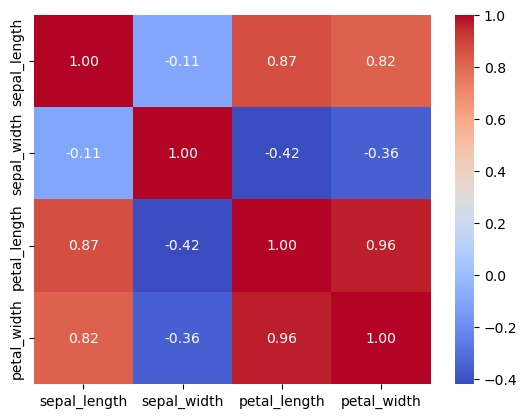

In [16]:
# correlation heatmap to know how strongly each variable is related to other
corr = df.iloc[:,:-1].corr()
sns.heatmap(corr,annot = True,cmap = 'coolwarm',fmt = ".2f")
plt.show()

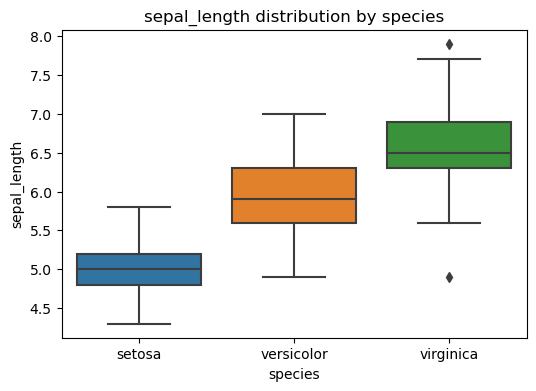

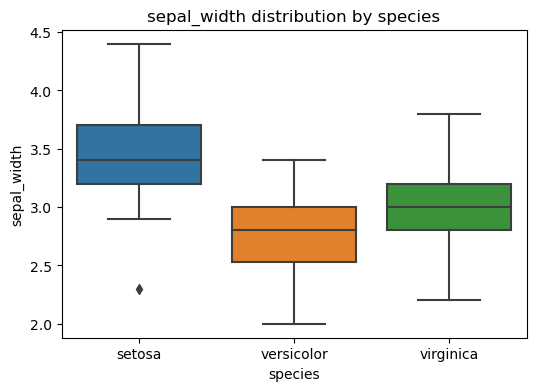

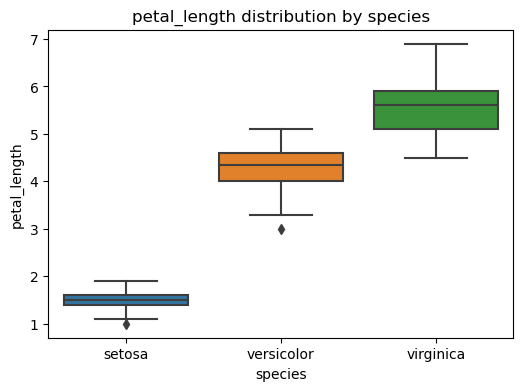

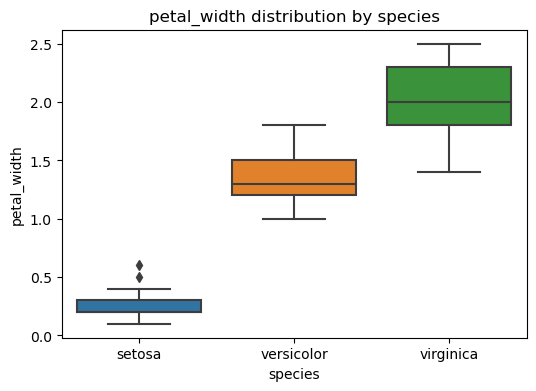

In [17]:
#to check outliers
for col in df.columns[:-1]: 
    plt.figure(figsize=(6,4))
    sns.boxplot(x="species", y=col, data=df)
    plt.title(f"{col} distribution by species")
    plt.show()


# Feature engineering

In [18]:
#Independent variables(X) = 4 columns
# dependent variable/target(y)

X = df.drop("species",axis = 1)
y = df["species"]

In [19]:
#divide the data into train set,test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (117, 4)
Test size: (30, 4)


# Train the model

In [20]:
# Train the data set using logistic regression to classify the species
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [21]:
y_pred = model.predict(X_test)

# Evaluating the model performance

In [22]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [23]:
## we got accuracy = 0.93 i.e., 93%.
## that means this model correctly predicts 93% flower species.

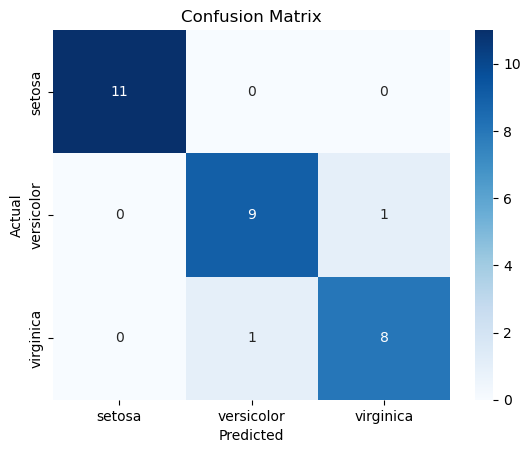

In [24]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
## setosa classified perfectly.most errors are between versicolor and virginica.

# applying decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

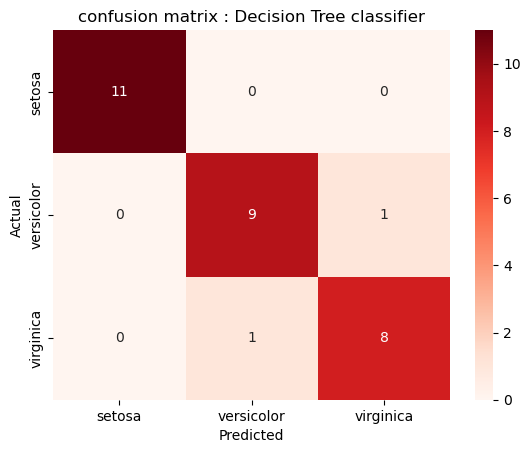

In [43]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Reds',
                       xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix : Decision Tree classifier")
plt.show()

## random forest classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

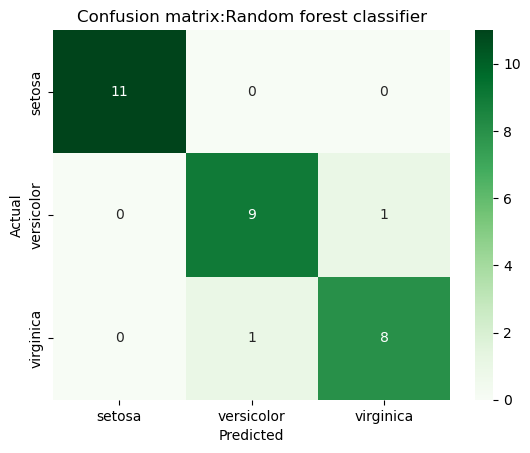

In [50]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = "Greens",
                                  xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix:Random forest classifier")
plt.show()

## svc

In [32]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [33]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

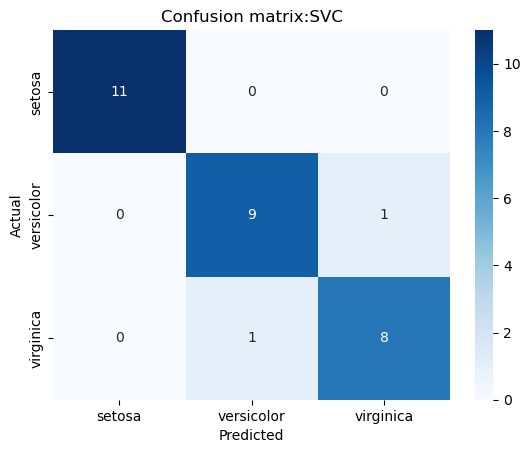

In [46]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues',
           xticklabels = model.classes_,yticklabels = model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix:SVC")
plt.show()

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

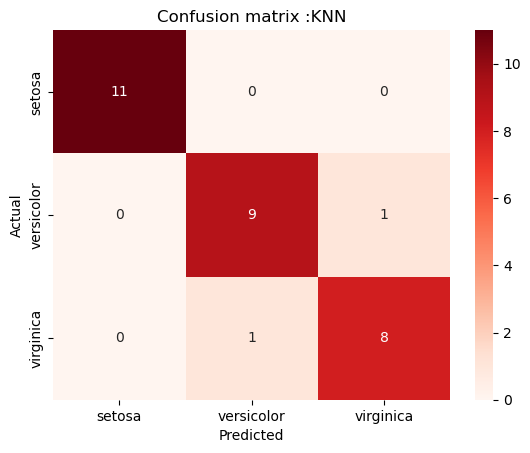

In [48]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Reds',
            xticklabels = model.classes_,yticklabels = model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix :KNN")
plt.show()

## Naivebayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

In [37]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

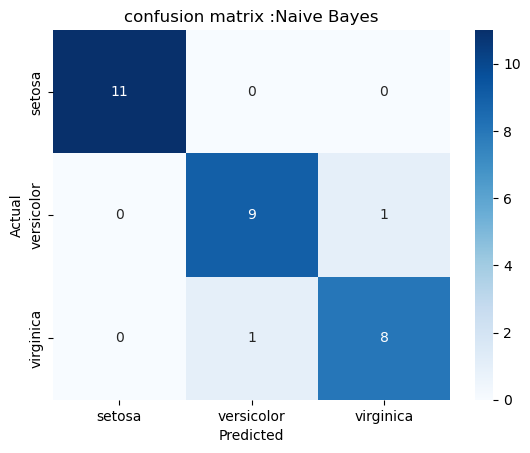

In [39]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion matrix :Naive Bayes")
plt.show()


In [49]:
#comparision table
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN", "Naive Bayes"],
    "Accuracy": [0.93, 0.93, 0.93, 0.93, 0.93, 0.93]  # replace with your actual results
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy
0,Logistic Regression,0.93
1,Decision Tree,0.93
2,Random Forest,0.93
3,SVM,0.93
4,KNN,0.93
5,Naive Bayes,0.93


In [ ]:
## Observations:
## Applied 6 models - logistic Regression,Decision Tree,Random Forest Classifier,SVC,KNN,Naive bayes.
## All the 6 models gave the same accuracy 0.93 that means all the models correctly predicts 93% of the flowers species.